<a href="https://colab.research.google.com/github/fercouri/Fundamentos-de-Mecanica-das-Estruturas/blob/main/Quest%C3%A3o_1_MAC019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TRABALHO MAC019**
Prof: Tatiana Danelon

#**Questão 1**

#**a)**

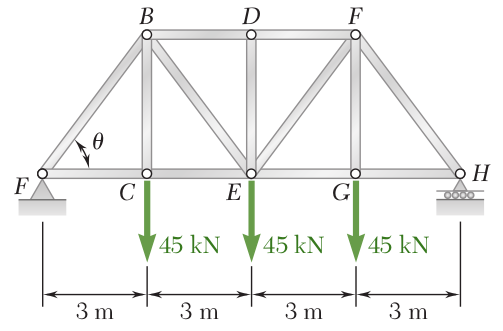

In [ ]:
import math
# instalação do anastruct
!pip install anastruct

# importando os pacotes
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from anastruct import SystemElements

a = 20 # Começa em 20 e termina em 80
results = []

for i in range(13):
    rad = math.radians(a)
    # Acha o comprimento das barras
    AB = 3/math.cos(rad)
    AC = 3
    BC = 3 * math.tan(rad)
    BE = AB
    DE = BC
    FE = BE
    FG = DE
    EG = 3
    GH = 3
    FH = AB
    BD = 3
    DF = 3
    CE = 3

    # Dicionário de nós nomeados: cada chave é um rótulo e o valor é uma coordenada [x, y]
    nodes = {
    'A' : [0, 0],   #nó A
    'B': [3, BC],     # nó B
    'C': [3, 0],     # nó C
    'D': [6, DE],     # nó D
    'E': [6, 0],    # nó E
    'F': [9, FG],    # nó F
    'G': [9, 0],    # nó G
    'H': [12, 0],    # nó H

    }

    # Fazer os calculos no papel para saber a altura y dos outros nós
    # Lista de conectividades entre os nós (por nome)
    # Cada par representa um elemento da treliça
    conec = [
          ['A','B'], ['A','C'],
          ['B','D'], ['B','E'], ['B','C'],
          ['C','E'],
          ['D','E'], ['D','F'],
          ['E','F'],['E','G'],
          ['F','G'],['F','H'],
          ['G','H'],


    ]

    # Carregamentos nodais: dicionário {nó: (Fx, Fy, M)}
    load = {
    'C': (0, -45000, 0),
    'E': (0, -45000, 0),
    'G': (0, -45000, 0),

    }

    # Apoios: dicionário {nó: (Rx, Ry, M)}, onde 1 = restringe, 0 = livre
    support = {
    'A': (1, 1, 0),   # apoio fixo (engastado sem momento)
    'H': (0, 1, 0)    # apoio de rolete horizontal (restringe em y)
    }

    #  Criação do sistema
    ss = SystemElements()

    # Adiciona os elementos da treliça a partir dos nomes dos nós
    for n1, n2 in conec:
        coord1 = nodes[n1]
        coord2 = nodes[n2]
        ss.add_truss_element(location=[coord1, coord2])

    # Aplicação dos carregamentos
    for name, (fx, fy, _) in load.items():
        node_coord = nodes[name]
        node_id = ss.find_node_id(node_coord) # acha o ID interno do nó onde será aplicada a carga a partir das coordenadas do nó
        ss.point_load(node_id=node_id, Fx=fx, Fy=fy) # aplica uma carga concentrada no nó identificado por node_id
        # Fx=fx aplica a componente da força na direção x e Fy=fy aplica na direção y

    # Definição dos apoios
    for s in support:
        restr = support[s]
        node_id = ss.find_node_id(nodes[s])

      # Apoio fixo (engaste): restringe x, y e rotação
        if restr == (1, 1, 1):
            ss.add_support_fixed(node_id=node_id)

        # Apoio 2º genero (articulação): restringe x e y, mas permite rotação
        elif restr == (1, 1, 0):
            ss.add_support_hinged(node_id=node_id)

        else:
            # Apoio 1º gênero: restringe x ou y
            if restr[0] == 1:
                ss.add_support_roll(node_id=node_id, direction=1)
            if restr[1] == 1:
                ss.add_support_roll(node_id=node_id, direction=2)


    # Solving the system to get results
    ss.solve()
    #print(f"Estrutura de angulo com valor igual a  {a} graus")
    #ss.show_structure()
    #ss.show_reaction_force()
    #ss.show_axial_force()

    # Acha as tensões nas barras
    TAB = ss.element_map[1].axial_force[0]
    TAC = ss.element_map[2].axial_force[0]
    TBC = ss.element_map[5].axial_force[0]
    TBE = ss.element_map[4].axial_force[0]
    TDE = ss.element_map[7].axial_force[0]
    TFE = ss.element_map[9].axial_force[0]
    TFG = ss.element_map[11].axial_force[0]
    TEG = ss.element_map[10].axial_force[0]
    TGH = ss.element_map[13].axial_force[0]
    TFH = ss.element_map[12].axial_force[0]
    TBD = ss.element_map[3].axial_force[0]
    TDF = ss.element_map[8].axial_force[0]
    TCE = ss.element_map[6].axial_force[0]

    TA = 1.4 * 10**8 # N/M**2, tensão admissível do aço

    # Converte as forças para positivo
    TAB = TAB if TAB > 0 else TAB*-1
    TAC = TAC if TAC > 0 else TAC*-1
    TBC = TBC if TBC > 0 else TBC*-1
    TBE = TBE if TBE > 0 else TBE*-1
    TDE = TDE if TDE > 0 else TDE*-1
    TFE = TFE if TFE > 0 else TFE*-1
    TFG = TFG if TFG > 0 else TFG*-1
    TEG = TEG if TEG > 0 else TEG*-1
    TGH = TGH if TGH > 0 else TGH*-1
    TFH = TFH if TFH > 0 else TFH*-1
    TBD = TBD if TBD > 0 else TBD*-1
    TDF = TDF if TDF > 0 else TDF*-1
    TCE = TCE if TCE > 0 else TCE*-1

    # Acha a área das barras
    aAB = TAB/TA # Area = pi * raio**2
    aAC = TAC/TA
    aBC = TBC/TA
    aBE = TBE/TA
    aDE = TDE/TA
    aFE = TFE/TA
    aFG = TFG/TA
    aEG = TEG/TA
    aGH = TGH/TA
    aFH = TFH/TA
    aBD = TBD/TA
    aDF = TDF/TA
    aCE = TCE/TA

    # Acha os diâmetros das barras
    dAB = 2*((aAB/3.14)**0.5) # Diametro = 2 * Raio =  2 * ((area/pi)**0.5)
    dAC = 2*((aAC/3.14)**0.5)
    dBC = 2*((aBC/3.14)**0.5)
    dBE = 2*((aBE/3.14)**0.5)
    dDE = 2*((aDE/3.14)**0.5)
    dFE = 2*((aFE/3.14)**0.5)
    dFG = 2*((aFG/3.14)**0.5)
    dEG = 2*((aEG/3.14)**0.5)
    dGH = 2*((aGH/3.14)**0.5)
    dFH = 2*((aFH/3.14)**0.5)
    dBD = 2*((aBD/3.14)**0.5)
    dDF = 2*((aDF/3.14)**0.5)
    dCE = 2*((aCE/3.14)**0.5)

    # Converte para milímetros
    dAB = dAB*1000
    dAC = dAC*1000
    dBC = dBC*1000
    dBE = dBE*1000
    dDE = dDE*1000
    dFE = dFE*1000
    dFG = dFG*1000
    dEG = dEG*1000
    dGH = dGH*1000
    dFH = dFH*1000
    dBD = dBD*1000
    dDF = dDF*1000
    dCE = dCE*1000

    #Acha o peso total das estruturas
    # 78000 é o peso especifico do aço
    pAB = 78000 * (aAB * AB)   # P = pe * (área * comprimento), em outras palavras,  Peso = Densidade * Volume
    pAC = 78000 * (aAC * AC)
    pBC = 78000 * (aBC * BC)
    pBE = 78000 * (aBE * BE)
    pDE = 78000 * (aDE * DE)
    pFE = 78000 * (aFE * FE)
    pFG = 78000 * (aFG * FG)
    pEG = 78000 * (aEG * EG)
    pGH = 78000 * (aGH * GH)
    pFH = 78000 * (aFH * FH)
    pBD = 78000 * (aBD * BD)
    pDF = 78000 * (aDF * DF)
    pCE = 78000 * (aCE * CE)

    pTOTAL= pAB + pAC + pBC + pBE + pDE + pFE + pFG + pEG + pGH + pFH + pBD + pDF + pCE # Soma os pesos das barras para achar o peso da estrutura
    pTOTAL = pTOTAL/9.8 # Converte de Newton para Kg

    results.append({
        'Angulo': a,
        'dAB': dAB,
        'dAC': dAC,
        'dBC': dBC,
        'dBE': dBE,
        'dDE': dDE,
        'dFE': dFE,
        'dFG': dFG,
        'dEG': dEG,
        'dGH': dGH,
        'dFH': dFH,
        'dBD': dBD,
        'dDF': dDF,
        'dCE': dCE,
        'pTOTAL': pTOTAL
    })
    a=a+5
# Encontrar o angulo com o menor valor de pTOTAL
registro_menor_peso = min(results, key=lambda x: x['pTOTAL'])
angulo_otimo = registro_menor_peso['Angulo']
menor_pTOTAL = registro_menor_peso['pTOTAL']

df_results = pd.DataFrame(results)
display(df_results.style.format({'Angulo': '{:.2f}','dAB':'{:.2f}', 'dAC':'{:.2f}','dBC':'{:.2f}','dBE':'{:.2f}','dDE':'{:.2f}','dFE':'{:.2f}','dFG':'{:.2f}','dEG':'{:.2f}','dGH':'{:.2f}','dFH':'{:.2f}','dBD':'{:.2f}','dDF':'{:.2f}','dCE':'{:.2f}', 'pTOTAL': '{:.2f}'}))
print(f"Ângulo ótimo: {angulo_otimo} graus")
print(f"Menor pTOTAL: {menor_pTOTAL} Kg")

,Angulo,dAB,dAC,dBC,dBE,dDE,dFE,dFG,dEG,dGH,dFH,dBD,dDF,dCE,pTOTAL
0,20.00,42.38,41.08,20.24,24.47,0.00,24.47,20.24,41.08,41.08,42.38,47.43,47.43,41.08,311.97
1,25.00,38.12,36.29,20.24,22.01,0.00,22.01,20.24,36.29,36.29,38.12,41.91,41.91,36.29,251.90
2,30.00,35.05,32.62,20.24,20.24,0.00,20.24,20.24,32.62,32.62,35.05,37.66,37.66,32.62,212.69
3,35.00,32.72,29.62,20.24,18.89,0.00,18.89,20.24,29.62,29.62,32.72,34.20,34.20,29.62,185.70
4,40.00,30.91,27.05,20.24,17.85,0.00,17.85,20.24,27.05,27.05,30.91,31.24,31.24,27.05,166.69
5,45.00,29.47,24.78,20.24,17.02,0.00,17.02,20.24,24.78,24.78,29.47,28.62,28.62,24.78,153.50
6,50.00,28.32,22.70,20.24,16.35,0.00,16.35,20.24,22.70,22.70,28.32,26.21,26.21,22.70,145.04
7,55.00,27.38,20.74,20.24,15.81,0.00,15.81,20.24,20.74,20.74,27.38,23.95,23.95,20.74,141.00
8,60.00,26.63,18.83,20.24,15.38,0.00,15.38,20.24,18.83,18.83,26.63,21.74,21.74,18.83,141.80
9,65.00,26.03,16.92,20.24,15.03,0.00,15.03,20.24,16.92,16.92,26.03,19.54,19.54,16.92,148.86


Ângulo ótimo: 55 graus
Menor pTOTAL: 141.00217953552374 Kg


#**b)**

Apenas repito o codigo da letra a mas com o  angulo variando de 1 em 1 grau e não de 5 em 5

In [ ]:
import math
# instalação do anastruct
!pip install anastruct

# importando os pacotes
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from anastruct import SystemElements

a = 20
results = [] # List to store results

for i in range(61):
    rad = math.radians(a)
    AB = 3/math.cos(rad)
    AC = 3
    BC = 3 * math.tan(rad)
    BE = AB
    DE = BC
    FE = BE
    FG = DE
    EG = 3
    GH = 3
    FH = AB
    BD = 3
    DF = 3
    CE = 3

    # Dicionário de nós nomeados: cada chave é um rótulo e o valor é uma coordenada [x, y]
    nodes = {
    'A' : [0, 0],   #nó A
    'B': [3, BC],     # nó B
    'C': [3, 0],     # nó C
    'D': [6, DE],     # nó D
    'E': [6, 0],    # nó E
    'F': [9, FG],    # nó F
    'G': [9, 0],    # nó G
    'H': [12, 0],    # nó H

    }

    # Fazer os calculos no papel para saber a altura y dos outros nós
    # Lista de conectividades entre os nós (por nome)
    # Cada par representa um elemento da treliça
    conec = [
          ['A','B'], ['A','C'],
          ['B','D'], ['B','E'], ['B','C'],
          ['C','E'],
          ['D','E'], ['D','F'],
          ['E','F'],['E','G'],
          ['F','G'],['F','H'],
          ['G','H'],


    ]

    # Carregamentos nodais: dicionário {nó: (Fx, Fy, M)}
    load = {
    'C': (0, -45000, 0),
    'E': (0, -45000, 0),
    'G': (0, -45000, 0),

    }

    # Apoios: dicionário {nó: (Rx, Ry, M)}, onde 1 = restringe, 0 = livre
    support = {
    'A': (1, 1, 0),   # apoio fixo (engastado sem momento)
    'H': (0, 1, 0)    # apoio de rolete horizontal (restringe em y)
    }

    #  Criação do sistema
    ss = SystemElements()

    # Adiciona os elementos da treliça a partir dos nomes dos nós
    for n1, n2 in conec:
        coord1 = nodes[n1]
        coord2 = nodes[n2]
        ss.add_truss_element(location=[coord1, coord2])

    # Aplicação dos carregamentos
    for name, (fx, fy, _) in load.items():
        node_coord = nodes[name]
        node_id = ss.find_node_id(node_coord) # acha o ID interno do nó onde será aplicada a carga a partir das coordenadas do nó
        ss.point_load(node_id=node_id, Fx=fx, Fy=fy) # aplica uma carga concentrada no nó identificado por node_id
        # Fx=fx aplica a componente da força na direção x e Fy=fy aplica na direção y

    # Definição dos apoios
    for s in support:
        restr = support[s]
        node_id = ss.find_node_id(nodes[s])

      # Apoio fixo (engaste): restringe x, y e rotação
        if restr == (1, 1, 1):
            ss.add_support_fixed(node_id=node_id)

        # Apoio 2º genero (articulação): restringe x e y, mas permite rotação
        elif restr == (1, 1, 0):
            ss.add_support_hinged(node_id=node_id)

        else:
            # Apoio 1º gênero: restringe x ou y
            if restr[0] == 1:
                ss.add_support_roll(node_id=node_id, direction=1)
            if restr[1] == 1:
                ss.add_support_roll(node_id=node_id, direction=2)


    # Solving the system to get results
    ss.solve()
    #print(f"Estrutura de angulo com valor igual a  {a} graus")
    #ss.show_structure()
    #ss.show_reaction_force()
    #ss.show_axial_force()


    TAB = ss.element_map[1].axial_force[0]
    TAC = ss.element_map[2].axial_force[0]
    TBC = ss.element_map[5].axial_force[0]
    TBE = ss.element_map[4].axial_force[0]
    TDE = ss.element_map[7].axial_force[0]
    TFE = ss.element_map[9].axial_force[0]
    TFG = ss.element_map[11].axial_force[0]
    TEG = ss.element_map[10].axial_force[0]
    TGH = ss.element_map[13].axial_force[0]
    TFH = ss.element_map[12].axial_force[0]
    TBD = ss.element_map[3].axial_force[0]
    TDF = ss.element_map[8].axial_force[0]
    TCE = ss.element_map[6].axial_force[0]

    TA = 1.4 * 10**8 # N/M**2

    # Converte as forças para positivo
    TAB = TAB if TAB > 0 else TAB*-1
    TAC = TAC if TAC > 0 else TAC*-1
    TBC = TBC if TBC > 0 else TBC*-1
    TBE = TBE if TBE > 0 else TBE*-1
    TDE = TDE if TDE > 0 else TDE*-1
    TFE = TFE if TFE > 0 else TFE*-1
    TFG = TFG if TFG > 0 else TFG*-1
    TEG = TEG if TEG > 0 else TEG*-1
    TGH = TGH if TGH > 0 else TGH*-1
    TFH = TFH if TFH > 0 else TFH*-1
    TBD = TBD if TBD > 0 else TBD*-1
    TDF = TDF if TDF > 0 else TDF*-1
    TCE = TCE if TCE > 0 else TCE*-1

    # Esta tudo bem as forças serem 0 já que estão no numerador
    aAB = TAB/TA # Area = pi * raio**2
    aAC = TAC/TA
    aBC = TBC/TA
    aBE = TBE/TA
    aDE = TDE/TA
    aFE = TFE/TA
    aFG = TFG/TA
    aEG = TEG/TA
    aGH = TGH/TA
    aFH = TFH/TA
    aBD = TBD/TA
    aDF = TDF/TA
    aCE = TCE/TA


    dAB = 2*((aAB/3.14)**0.5) # Diametro = 2 * Raio =  2 * ((area/pi)**0.5)
    dAC = 2*((aAC/3.14)**0.5)
    dBC = 2*((aBC/3.14)**0.5)
    dBE = 2*((aBE/3.14)**0.5)
    dDE = 2*((aDE/3.14)**0.5)
    dFE = 2*((aFE/3.14)**0.5)
    dFG = 2*((aFG/3.14)**0.5)
    dEG = 2*((aEG/3.14)**0.5)
    dGH = 2*((aGH/3.14)**0.5)
    dFH = 2*((aFH/3.14)**0.5)
    dBD = 2*((aBD/3.14)**0.5)
    dDF = 2*((aDF/3.14)**0.5)
    dCE = 2*((aCE/3.14)**0.5)



    pAB = 78000 * (aAB * AB)
    pAC = 78000 * (aAC * AC)
    pBC = 78000 * (aBC * BC)
    pBE = 78000 * (aBE * BE)
    pDE = 78000 * (aDE * DE)
    pFE = 78000 * (aFE * FE)
    pFG = 78000 * (aFG * FG)
    pEG = 78000 * (aEG * EG)
    pGH = 78000 * (aGH * GH)
    pFH = 78000 * (aFH * FH)
    pBD = 78000 * (aBD * BD)
    pDF = 78000 * (aDF * DF)
    pCE = 78000 * (aCE * CE)

    pTOTAL= pAB + pAC + pBC + pBE + pDE + pFE + pFG + pEG + pGH + pFH + pBD + pDF + pCE

    results.append({
        'Angulo': a,
        'dAB': dAB,
        'dAC': dAC,
        'dBC': dBC,
        'dBE': dBE,
        'dDE': dDE,
        'dFE': dFE,
        'dFG': dFG,
        'dEG': dEG,
        'dGH': dGH,
        'dFH': dFH,
        'dBD': dBD,
        'dDF': dDF,
        'dCE': dCE,
        'pTOTAL': pTOTAL
    })
    a=a+1
# Encontrar o angulo com o menor valor de pTOTAL
registro_menor_peso = min(results, key=lambda x: x['pTOTAL'])
angulo_otimo = registro_menor_peso['Angulo']
menor_pTOTAL = registro_menor_peso['pTOTAL']

df_results = pd.DataFrame(results)
display(df_results)
print(f"Ângulo ótimo: {angulo_otimo} graus")
print(f"Menor pTOTAL: {menor_pTOTAL} N")

,Angulo,dAB,dAC,dBC,dBE,dDE,dFE,dFG,dEG,dGH,dFH,dBD,dDF,dCE,pTOTAL
0,20,0.042377,0.041079,0.020235,0.024466,4.116861e-09,0.024466,0.020235,0.041079,0.041079,0.042377,0.047434,0.047434,0.041079,3057.348245
1,21,0.041399,0.040000,0.020235,0.023902,0.000000e+00,0.023902,0.020235,0.040000,0.040000,0.041399,0.046188,0.046188,0.040000,2916.391068
2,22,0.040492,0.038990,0.020235,0.023378,0.000000e+00,0.023378,0.020235,0.038990,0.038990,0.040492,0.045021,0.045021,0.038990,2788.597693
3,23,0.039647,0.038039,0.020235,0.022890,4.116861e-09,0.022890,0.020235,0.038039,0.038039,0.039647,0.043923,0.043923,0.038039,2672.271850
4,24,0.038859,0.037142,0.020235,0.022436,0.000000e+00,0.022436,0.020235,0.037142,0.037142,0.038859,0.042888,0.042888,0.037142,2566.002012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,76,0.025159,0.012375,0.020235,0.014526,0.000000e+00,0.014526,0.020235,0.012375,0.012375,0.025159,0.014289,0.014289,0.012375,2072.550523
57,77,0.025107,0.011908,0.020235,0.014495,0.000000e+00,0.014495,0.020235,0.011908,0.011908,0.025107,0.013750,0.013750,0.011908,2197.837388
58,78,0.025058,0.011426,0.020235,0.014467,0.000000e+00,0.014467,0.020235,0.011426,0.011426,0.025058,0.013193,0.013193,0.011426,2346.954414
59,79,0.025014,0.010926,0.020235,0.014442,0.000000e+00,0.014442,0.020235,0.010926,0.010926,0.025014,0.012617,0.012617,0.010926,2526.346194


Ângulo ótimo: 57 graus
Menor pTOTAL: 1378.7452321447688 N


from matplotlib import pyplot as plt
df_results['Angulo'].plot(kind='hist', bins=20, title='Angulo')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_results['dAB'].plot(kind='hist', bins=20, title='dAB')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_results['dAC'].plot(kind='hist', bins=20, title='dAC')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_results['dBC'].plot(kind='hist', bins=20, title='dBC')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_results.plot(kind='scatter', x='Angulo', y='dAB', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_results.plot(kind='scatter', x='dAB', y='dAC', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_results.plot(kind='scatter', x='dAC', y='dBC', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_results.plot(kind='scatter', x='dBC', y='dBE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Angulo']
  ys = series['dAB']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_results.sort_values('Angulo', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Angulo')
_ = plt.ylabel('dAB')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Angulo']
  ys = series['dAC']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_results.sort_values('Angulo', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Angulo')
_ = plt.ylabel('dAC')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Angulo']
  ys = series['dBC']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_results.sort_values('Angulo', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Angulo')
_ = plt.ylabel('dBC')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Angulo']
  ys = series['dBE']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_results.sort_values('Angulo', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Angulo')
_ = plt.ylabel('dBE')

from matplotlib import pyplot as plt
df_results['Angulo'].plot(kind='line', figsize=(8, 4), title='Angulo')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_results['dAB'].plot(kind='line', figsize=(8, 4), title='dAB')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_results['dAC'].plot(kind='line', figsize=(8, 4), title='dAC')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_results['dBC'].plot(kind='line', figsize=(8, 4), title='dBC')
plt.gca().spines[['top', 'right']].set_visible(False)